# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
cities

['port mathurin',
 'bredasdorp',
 'puerto natales',
 'labytnangi',
 'aasiaat',
 'west island',
 'kuqa',
 'agios nikolaos',
 'olonkinbyen',
 'blackmans bay',
 'berdigestyakh',
 'igarka',
 'puerto ayora',
 'mogocha',
 'st albans',
 'ilulissat',
 'adamstown',
 'bamusso',
 'ishigaki',
 'albany',
 'ciudad lazaro cardenas',
 'badger',
 'bilibino',
 "nar'yan-mar",
 'thompson',
 'port-aux-francais',
 'tshabong',
 'ust-nera',
 'gourdon',
 'villa de arista',
 'valle de la pascua',
 'otjiwarongo',
 'auki',
 "'ohonua",
 'moskovskiy',
 'yellowknife',
 'sibolga',
 'isafjordur',
 "st. john's",
 'chinchilla',
 'lerwick',
 'avarua',
 'beyla',
 'colonia aurora',
 'noormarkku',
 "al bayda'",
 'punta arenas',
 'cargados carajos',
 'turpan',
 'taiohae',
 'college',
 'ushuaia',
 'grytviken',
 'i-n-salah',
 'hermanus',
 'edinburgh of the seven seas',
 'saipan',
 'karratha',
 'waitangi',
 'luderitz',
 'qaqortoq',
 'bethel',
 'mogadishu',
 'khorugh',
 'jiuquan',
 'illela',
 'sitka',
 'hawaiian paradise park',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key }" 

weather_api_key = weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426c5ece184&q=port mathurin
Processing Record 1 of Set 1 | port mathurin
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426c5ece184&q=bredasdorp
Processing Record 2 of Set 1 | bredasdorp
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426c5ece184&q=puerto natales
Processing Record 3 of Set 1 | puerto natales
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426c5ece184&q=labytnangi
Processing Record 4 of Set 1 | labytnangi
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426c5ece184&q=aasiaat
Processing Record 5 of Set 1 | aasiaat
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426c5ece184&q=west island
Processing Record 6 of Set 1 | west island
https://api.openweathermap.org/data/2.5/weather?appid=4431decfdba10b503b2d1426

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,299.95,75,1,1.66,MU,1746490673
1,bredasdorp,-34.5322,20.0403,286.03,91,0,1.40,ZA,1746490674
2,puerto natales,-51.7236,-72.4875,276.01,88,100,1.12,CL,1746490676
3,labytnangi,66.6572,66.4183,268.21,94,69,1.90,RU,1746490677
4,aasiaat,68.7098,-52.8699,269.49,95,100,8.85,GL,1746490678


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,299.95,75,1,1.66,MU,1746490673
1,bredasdorp,-34.5322,20.0403,286.03,91,0,1.40,ZA,1746490674
2,puerto natales,-51.7236,-72.4875,276.01,88,100,1.12,CL,1746490676
3,labytnangi,66.6572,66.4183,268.21,94,69,1.90,RU,1746490677
4,aasiaat,68.7098,-52.8699,269.49,95,100,8.85,GL,1746490678


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

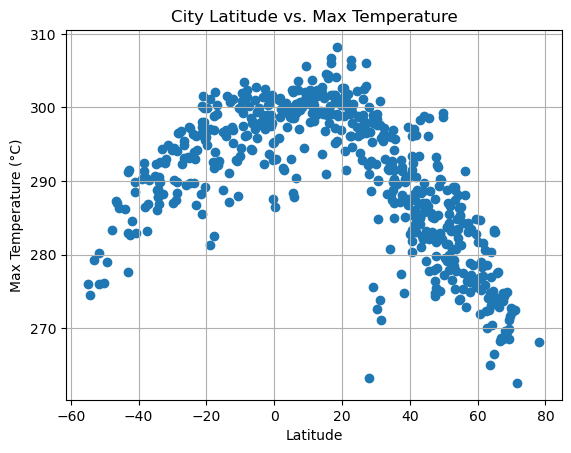

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

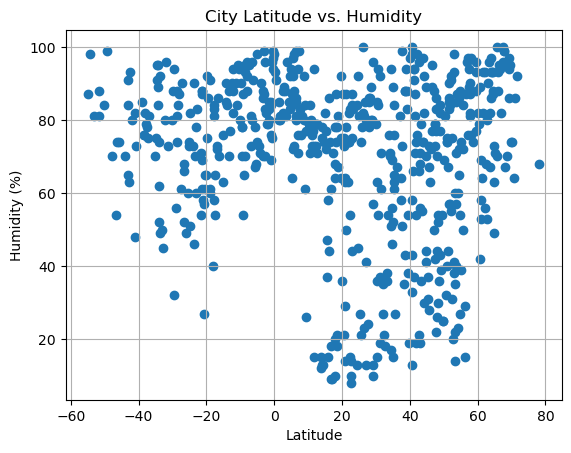

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

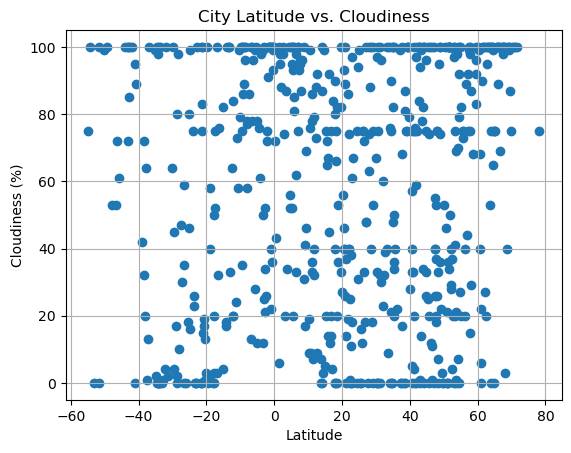

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

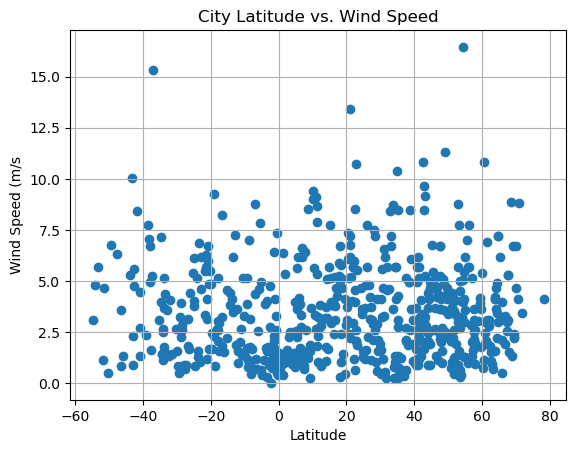

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_color="red"):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    #line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_value**2:.2f}"
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}   R² = {r_value**2:.2f}"
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_values, color=line_color)
    y_min, y_max = min(y_values), max(y_values)
    plt.ylim(y_min, y_max + (y_max - y_min) * 0.2)
    # plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color=line_color)
    # plt.text(min(x_values), max(y_values) + 1, line_eq, fontsize=15, color=line_color)
    plt.text(min(x_values), y_max + (y_max - y_min) * 0.05, line_eq, fontsize=12, color=line_color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,labytnangi,66.6572,66.4183,268.21,94,69,1.90,RU,1746490677
4,aasiaat,68.7098,-52.8699,269.49,95,100,8.85,GL,1746490678
6,kuqa,41.7278,82.9364,296.21,19,97,2.90,CN,1746490680
7,agios nikolaos,35.1914,25.7133,290.24,76,34,2.72,GR,1746490681
8,olonkinbyen,70.9221,-8.7187,272.50,86,100,8.80,SJ,1746490683


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,299.95,75,1,1.66,MU,1746490673
1,bredasdorp,-34.5322,20.0403,286.03,91,0,1.40,ZA,1746490674
2,puerto natales,-51.7236,-72.4875,276.01,88,100,1.12,CL,1746490676
5,west island,-12.1568,96.8225,301.14,94,20,3.60,CC,1746490679
9,blackmans bay,-43.0167,147.3167,291.22,65,100,0.89,AU,1746490684


###  Temperature vs. Latitude Linear Regression Plot

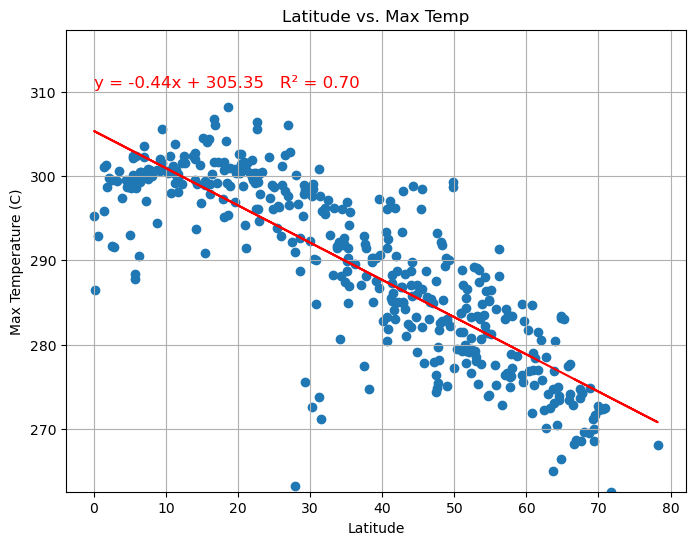

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as s

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
"Latitude vs. Max Temp",
"Latitude", "Max Temperature (C)")

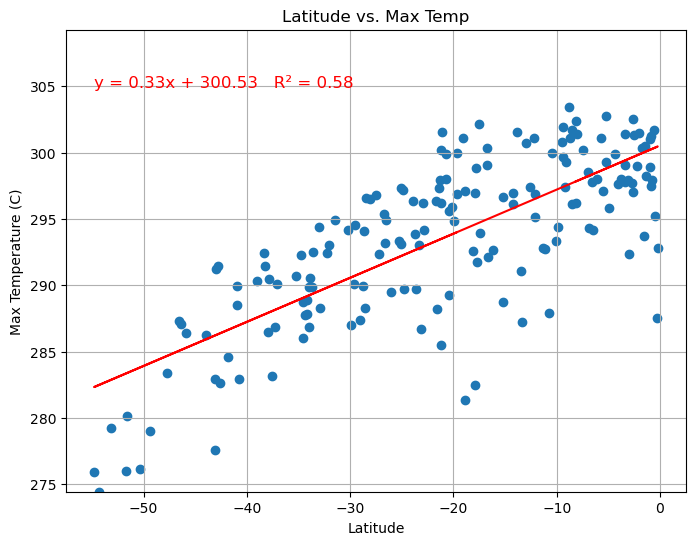

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Latitude vs. Max Temp",
                       "Latitude", "Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

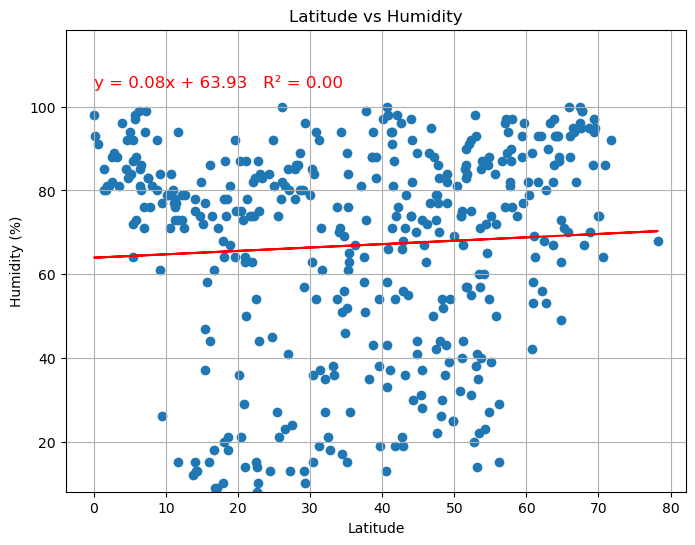

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Latitude vs Humidity",
                       "Latitude", "Humidity (%)")

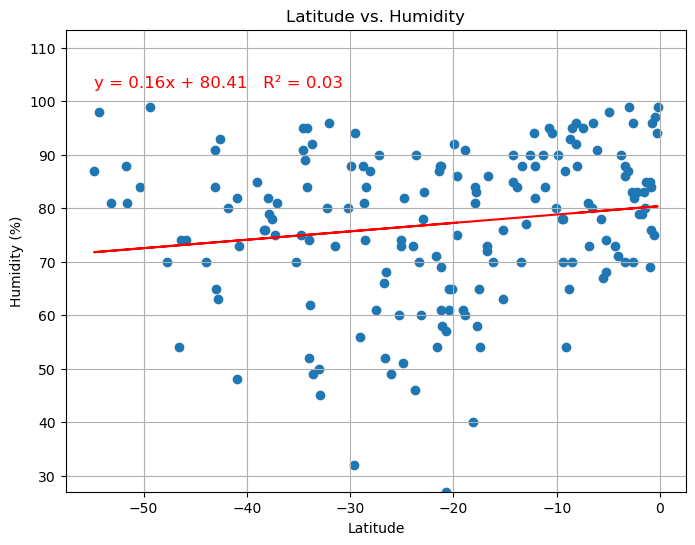

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

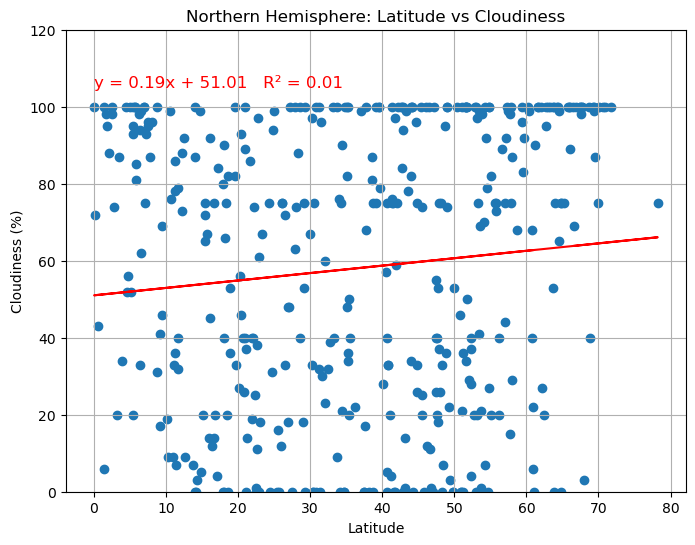

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere: Latitude vs Cloudiness",
                       "Latitude", "Cloudiness (%)")

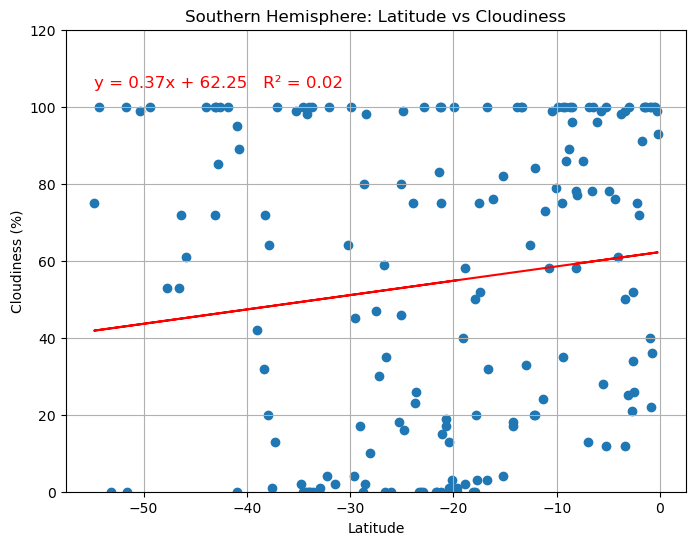

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere: Latitude vs Cloudiness",
                       "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

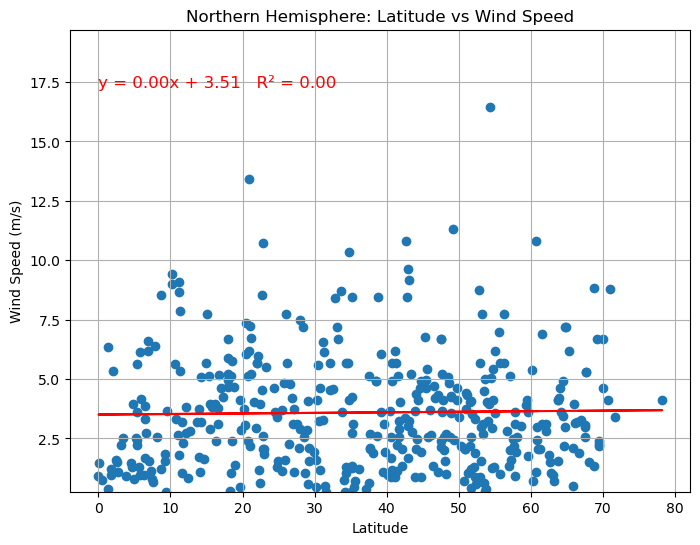

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere: Latitude vs Wind Speed",
                       "Latitude", "Wind Speed (m/s)")

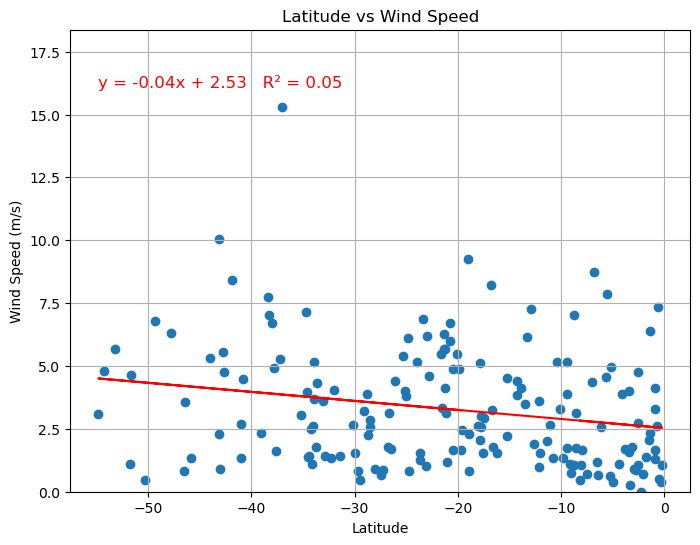

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Latitude vs Wind Speed",
                       "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE